In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import geopandas as gpd
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
glueck_2018 = pd.read_csv('./data/20230828_3.3_Datensatz_Glueck_2018.csv')
glueck_2019 = pd.read_csv('./data/20230828_3.3_Datensatz_Glueck_2019.csv')
glueck_2018_2019 = pd.read_csv('./data/20230828_3.3_Datensatz_Glueck_2018-2019.csv')
#display(glueck_2018)
#display(glueck_2019)
#display(glueck_2018_2019)
print(glueck_2018_2019.describe())
# Berechne die Korrelationsmatrix
correlation_matrix = glueck_2018_2019.corr(numeric_only=True)
#display(correlation_matrix)

       Overall rank         Year       Score  GDP per capita  Social support  \
count    312.000000   312.000000  312.000000      312.000000      312.000000   
mean      78.500000  2018.500000    5.391506        0.898298        1.211026   
std       45.104737     0.500803    1.114631        0.394592        0.300310   
min        1.000000  2018.000000    2.853000        0.000000        0.000000   
25%       39.750000  2018.000000    4.514250        0.609500        1.055750   
50%       78.500000  2018.500000    5.379500        0.960000        1.265500   
75%      117.250000  2019.000000    6.176000        1.219500        1.457500   
max      156.000000  2019.000000    7.769000        2.096000        1.644000   

       Healthy life expectancy  Freedom to make life choices  Generosity  \
count               312.000000                    312.000000  312.000000   
mean                  0.661295                      0.423538    0.182926   
std                   0.252724                     

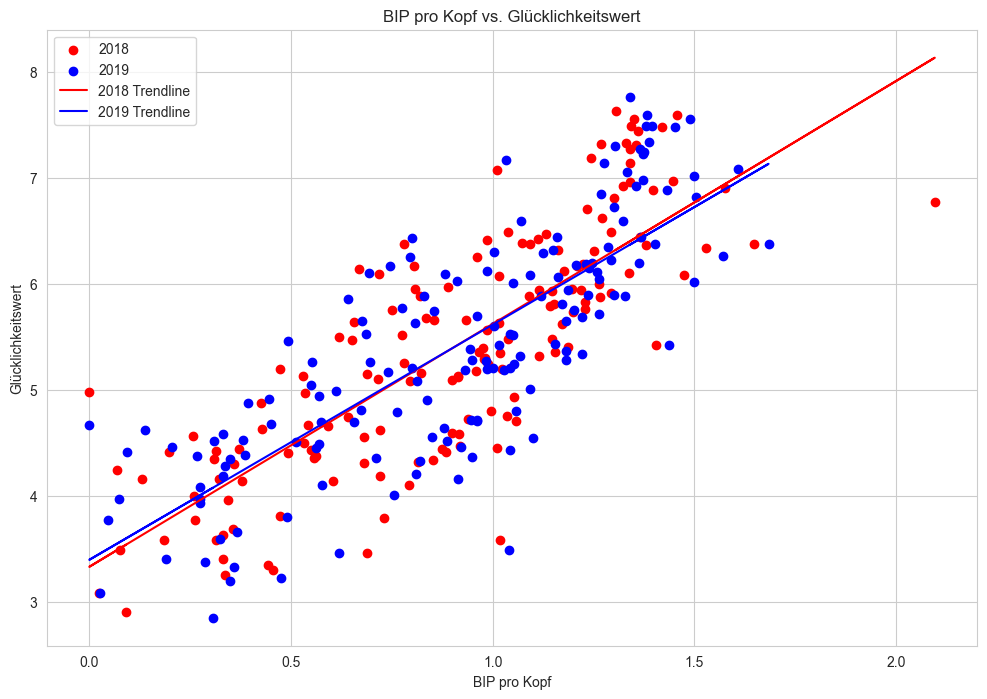

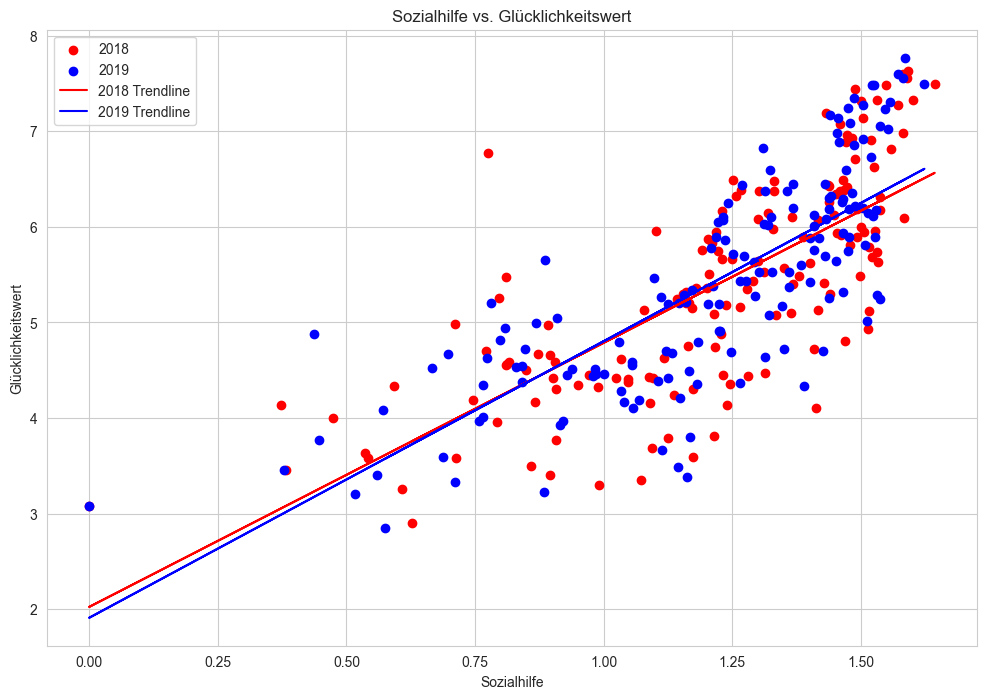

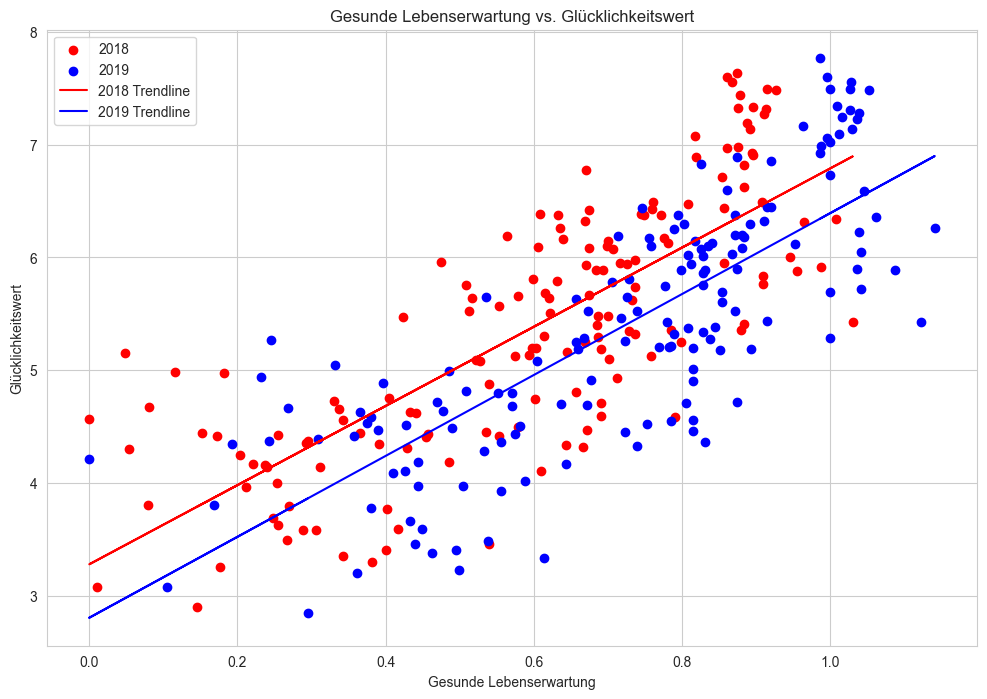

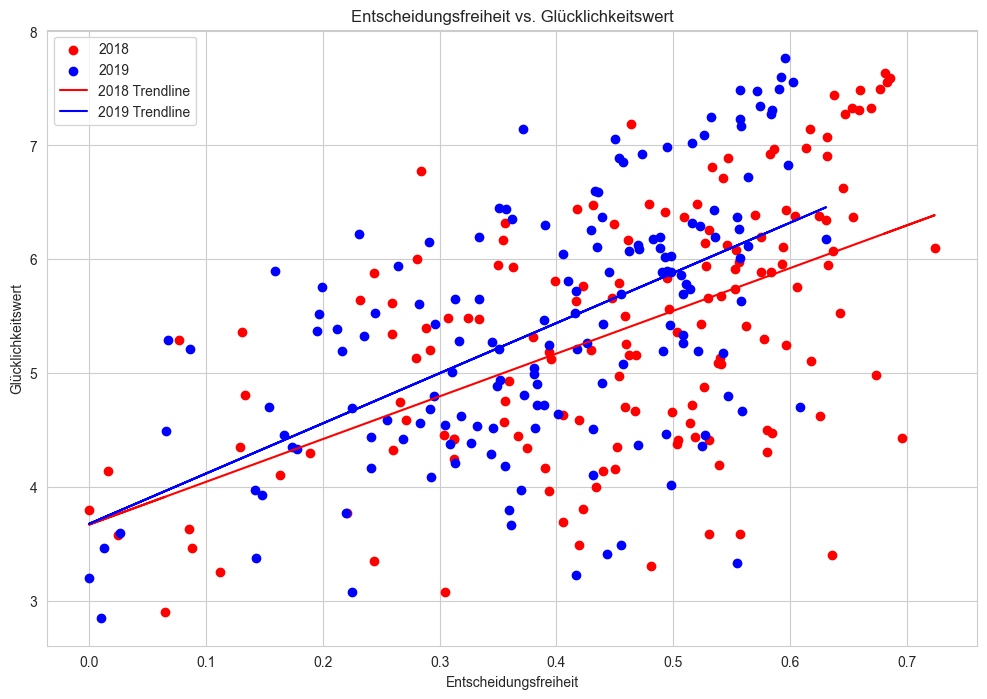

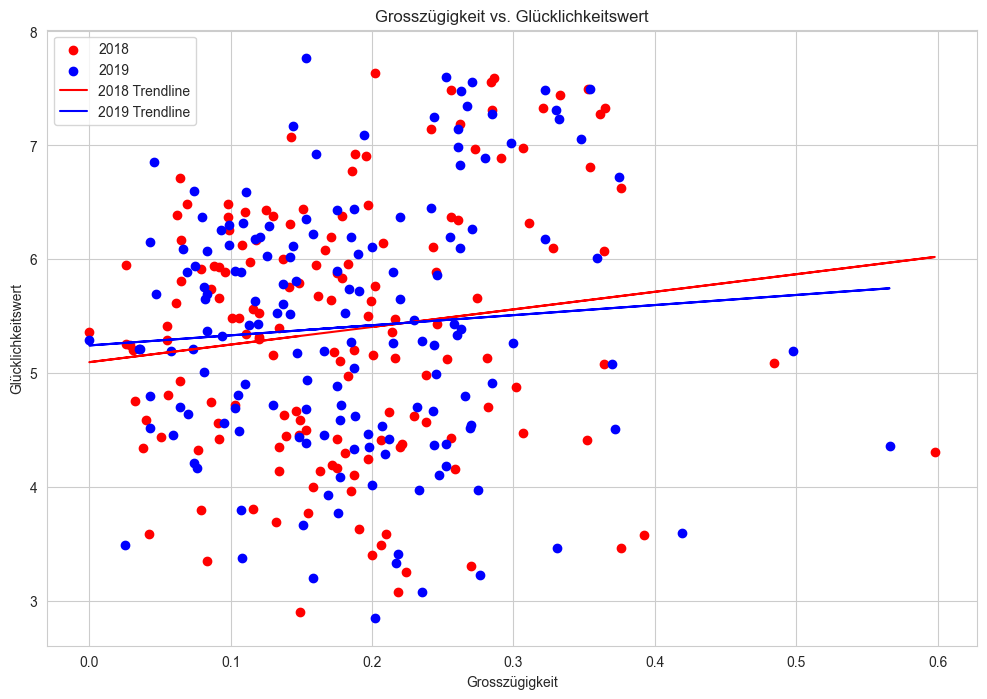

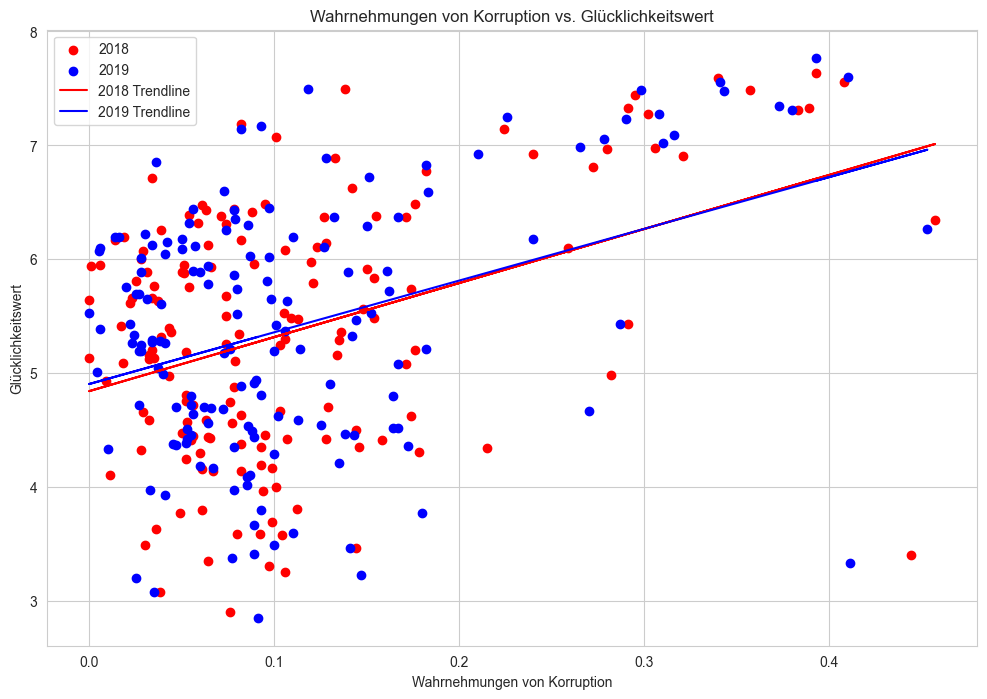

In [3]:
# 2. Scatterplots
plt.figure(figsize=(12, 8))
plt.scatter(glueck_2018['GDP per capita'], glueck_2018['Score'], label='2018', color='red')
plt.scatter(glueck_2019['GDP per capita'], glueck_2019['Score'], label='2019', color='blue')
m, b = np.polyfit(glueck_2018['GDP per capita'], glueck_2018['Score'], 1)  # 1 indicates a linear regression
plt.plot(glueck_2018['GDP per capita'], m * glueck_2018['GDP per capita'] + b, color='red', label='2018 Trendline')
m, b = np.polyfit(glueck_2019['GDP per capita'], glueck_2019['Score'], 1)  # 1 indicates a linear regression
plt.plot(glueck_2019['GDP per capita'], m * glueck_2019['GDP per capita'] + b, color='blue', label='2019 Trendline')
plt.xlabel('BIP pro Kopf')
plt.ylabel('Glücklichkeitswert')
plt.title('BIP pro Kopf vs. Glücklichkeitswert')
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(12, 8))
plt.scatter(glueck_2018['Social support'], glueck_2018['Score'], label='2018', color='red')
plt.scatter(glueck_2019['Social support'], glueck_2019['Score'], label='2019', color='blue')
m, b = np.polyfit(glueck_2018['Social support'], glueck_2018['Score'], 1)  # 1 indicates a linear regression
plt.plot(glueck_2018['Social support'], m * glueck_2018['Social support'] + b, color='red', label='2018 Trendline')
m, b = np.polyfit(glueck_2019['Social support'], glueck_2019['Score'], 1)  # 1 indicates a linear regression
plt.plot(glueck_2019['Social support'], m * glueck_2019['Social support'] + b, color='blue', label='2019 Trendline')
plt.xlabel('Sozialhilfe')
plt.ylabel('Glücklichkeitswert')
plt.title('Sozialhilfe vs. Glücklichkeitswert')
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(12, 8))
plt.scatter(glueck_2018['Healthy life expectancy'], glueck_2018['Score'], label='2018', color='red')
plt.scatter(glueck_2019['Healthy life expectancy'], glueck_2019['Score'], label='2019', color='blue')
m, b = np.polyfit(glueck_2018['Healthy life expectancy'], glueck_2018['Score'], 1)  # 1 indicates a linear regression
plt.plot(glueck_2018['Healthy life expectancy'], m * glueck_2018['Healthy life expectancy'] + b, color='red', label='2018 Trendline')
m, b = np.polyfit(glueck_2019['Healthy life expectancy'], glueck_2019['Score'], 1)  # 1 indicates a linear regression
plt.plot(glueck_2019['Healthy life expectancy'], m * glueck_2019['Healthy life expectancy'] + b, color='blue', label='2019 Trendline')
plt.xlabel('Gesunde Lebenserwartung')
plt.ylabel('Glücklichkeitswert')
plt.title('Gesunde Lebenserwartung vs. Glücklichkeitswert')
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(12, 8))
plt.scatter(glueck_2018['Freedom to make life choices'], glueck_2018['Score'], label='2018', color='red')
plt.scatter(glueck_2019['Freedom to make life choices'], glueck_2019['Score'], label='2019', color='blue')
m, b = np.polyfit(glueck_2018['Freedom to make life choices'], glueck_2018['Score'], 1)  # 1 indicates a linear regression
plt.plot(glueck_2018['Freedom to make life choices'], m * glueck_2018['Freedom to make life choices'] + b, color='red', label='2018 Trendline')
m, b = np.polyfit(glueck_2019['Freedom to make life choices'], glueck_2019['Score'], 1)  # 1 indicates a linear regression
plt.plot(glueck_2019['Freedom to make life choices'], m * glueck_2019['Freedom to make life choices'] + b, color='blue', label='2019 Trendline')
plt.xlabel('Entscheidungsfreiheit')
plt.ylabel('Glücklichkeitswert')
plt.title('Entscheidungsfreiheit vs. Glücklichkeitswert')
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(12, 8))
plt.scatter(glueck_2018['Generosity'], glueck_2018['Score'], label='2018', color='red')
plt.scatter(glueck_2019['Generosity'], glueck_2019['Score'], label='2019', color='blue')
m, b = np.polyfit(glueck_2018['Generosity'], glueck_2018['Score'], 1)  # 1 indicates a linear regression
plt.plot(glueck_2018['Generosity'], m * glueck_2018['Generosity'] + b, color='red', label='2018 Trendline')
m, b = np.polyfit(glueck_2019['Generosity'], glueck_2019['Score'], 1)  # 1 indicates a linear regression
plt.plot(glueck_2019['Generosity'], m * glueck_2019['Generosity'] + b, color='blue', label='2019 Trendline')
plt.xlabel('Grosszügigkeit')
plt.ylabel('Glücklichkeitswert')
plt.title('Grosszügigkeit vs. Glücklichkeitswert')
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(12, 8))
plt.scatter(glueck_2018['Perceptions of corruption'], glueck_2018['Score'], label='2018', color='red')
plt.scatter(glueck_2019['Perceptions of corruption'], glueck_2019['Score'], label='2019', color='blue')
m, b = np.polyfit(glueck_2018['Perceptions of corruption'], glueck_2018['Score'], 1)  # 1 indicates a linear regression
plt.plot(glueck_2018['Perceptions of corruption'], m * glueck_2018['Perceptions of corruption'] + b, color='red', label='2018 Trendline')
m, b = np.polyfit(glueck_2019['Perceptions of corruption'], glueck_2019['Score'], 1)  # 1 indicates a linear regression
plt.plot(glueck_2019['Perceptions of corruption'], m * glueck_2019['Perceptions of corruption'] + b, color='blue', label='2019 Trendline')
plt.xlabel('Wahrnehmungen von Korruption')
plt.ylabel('Glücklichkeitswert')
plt.title('Wahrnehmungen von Korruption vs. Glücklichkeitswert')
plt.legend(loc='upper left')
plt.show()


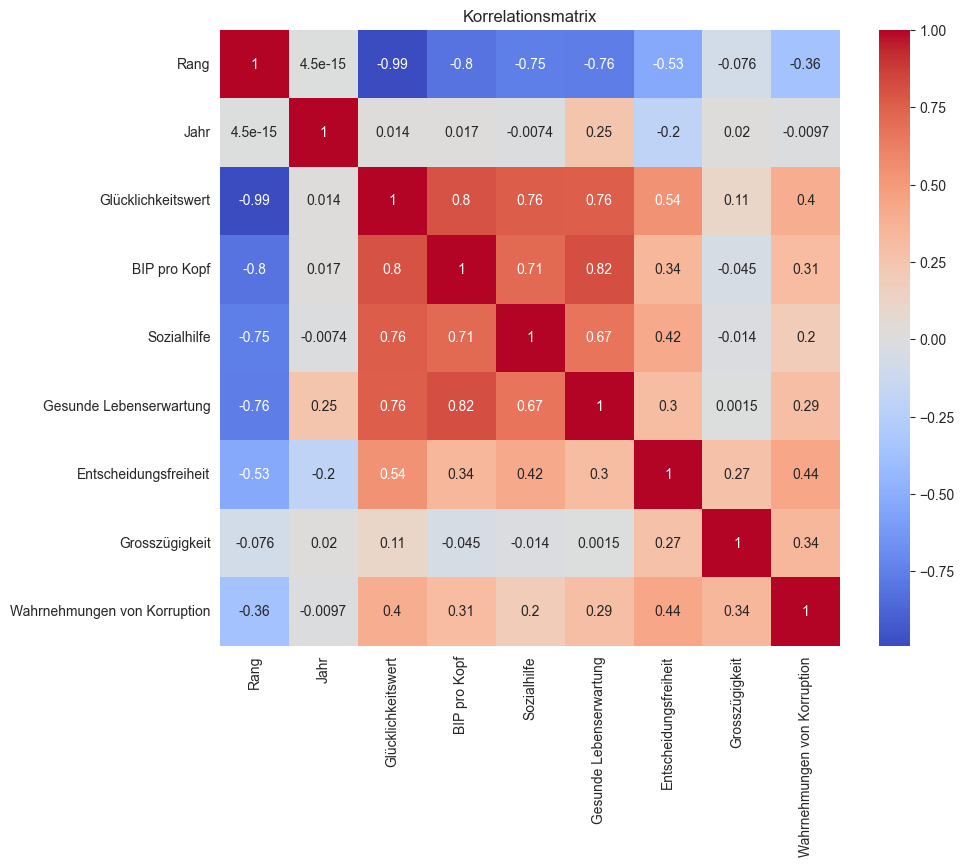

                              Overall rank          Year     Score  \
Overall rank                  1.000000e+00  4.501924e-15 -0.990325   
Year                          4.501924e-15  1.000000e+00  0.014009   
Score                        -9.903250e-01  1.400893e-02  1.000000   
GDP per capita               -8.037573e-01  1.738595e-02  0.797977   
Social support               -7.523724e-01 -7.376014e-03  0.761080   
Healthy life expectancy      -7.573946e-01  2.534442e-01  0.755875   
Freedom to make life choices -5.264284e-01 -1.988010e-01  0.539897   
Generosity                   -7.623314e-02  1.987775e-02  0.106645   
Perceptions of corruption    -3.633288e-01 -9.702012e-03  0.396947   

                              GDP per capita  Social support  \
Overall rank                       -0.803757       -0.752372   
Year                                0.017386       -0.007376   
Score                               0.797977        0.761080   
GDP per capita                      1.00000

In [4]:
# 6. Heatmap für die gesamte Korrelationsmatrix
new_columns = ['Rang', 'Jahr','Glücklichkeitswert','BIP pro Kopf','Sozialhilfe','Gesunde Lebenserwartung','Entscheidungsfreiheit','Grosszügigkeit','Wahrnehmungen von Korruption']
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', xticklabels=new_columns, yticklabels=new_columns)
plt.title('Korrelationsmatrix')
plt.show()
print(correlation_matrix)

Overall Rank korreliert stark im Minus mit Score, das ist logisch, um so höher der Rank, desto niedriger der Score

In [5]:
new_columns_with_year = ['Rang', 'Land', 'Jahr','Glücklichkeitswert','BIP pro Kopf','Sozialhilfe','Gesunde Lebenserwartung','Entscheidungsfreiheit','Grosszügigkeit','Wahrnehmungen von Korruption']
new_columns = ['Rang', 'Land','Glücklichkeitswert','BIP pro Kopf','Sozialhilfe','Gesunde Lebenserwartung','Entscheidungsfreiheit','Grosszügigkeit','Wahrnehmungen von Korruption']

with_german_columns_2018_2019 = glueck_2018_2019
with_german_columns_2018_2019.columns = new_columns_with_year
display(with_german_columns_2018_2019)

with_german_columns_2018 = glueck_2018
with_german_columns_2018.columns = new_columns
display(with_german_columns_2018)

with_german_columns_2019 = glueck_2019
with_german_columns_2019.columns = new_columns
display(with_german_columns_2019)

Rang         Land  Jahr  Glücklichkeitswert  BIP pro Kopf  Sozialhilfe  \
0     154  Afghanistan  2019               3.203         0.350        0.517   
1     145  Afghanistan  2018               3.632         0.332        0.537   
2     107      Albania  2019               4.719         0.947        0.848   
3     112      Albania  2018               4.586         0.916        0.817   
4      88      Algeria  2019               5.211         1.002        1.160   
..    ...          ...   ...                 ...           ...          ...   
307   152        Yemen  2018               3.355         0.442        1.073   
308   138       Zambia  2019               4.107         0.578        1.058   
309   125       Zambia  2018               4.377         0.562        1.047   
310   146     Zimbabwe  2019               3.663         0.366        1.114   
311   144     Zimbabwe  2018               3.692         0.357        1.094   

     Gesunde Lebenserwartung  Entscheidungsfreiheit  Grosszügigkeit  \
0                      0.361                  0.000           0.158   
1                      0.255                  0.085           0.191   
2                      0.874                  0.383           0.178   
3                      0.790                  0.419           0.149   
4                      0.785                  0.086           0.073   
..                       ...                    ...             ...   
307                    0.343                  0.244           0.083   
308                    0.426                  0.431           0.247   
309                    0.295                  0.503           0.221   
310                    0.433                  0.361           0.151   
311                    0.248                  0.406           0.132   

     Wahrnehmungen von Korruption  
0                           0.025  
1                           0.036  
2                           0.027  
3                           0.032  
4                           0.114  
..                            ...  
307                         0.064  
308                         0.087  
309                         0.082  
310                         0.089  
311                         0.099  

[312 rows x 10 columns]

Rang                      Land  Glücklichkeitswert  BIP pro Kopf  \
0       1                   Finland               7.632         1.305   
1       2                    Norway               7.594         1.456   
2       3                   Denmark               7.555         1.351   
3       4                   Iceland               7.495         1.343   
4       5               Switzerland               7.487         1.420   
..    ...                       ...                 ...           ...   
151   152                     Yemen               3.355         0.442   
152   153                  Tanzania               3.303         0.455   
153   154               South Sudan               3.254         0.337   
154   155  Central African Republic               3.083         0.024   
155   156                   Burundi               2.905         0.091   

     Sozialhilfe  Gesunde Lebenserwartung  Entscheidungsfreiheit  \
0          1.592                    0.874                  0.681   
1          1.582                    0.861                  0.686   
2          1.590                    0.868                  0.683   
3          1.644                    0.914                  0.677   
4          1.549                    0.927                  0.660   
..           ...                      ...                    ...   
151        1.073                    0.343                  0.244   
152        0.991                    0.381                  0.481   
153        0.608                    0.177                  0.112   
154        0.000                    0.010                  0.305   
155        0.627                    0.145                  0.065   

     Grosszügigkeit  Wahrnehmungen von Korruption  
0             0.202                         0.393  
1             0.286                         0.340  
2             0.284                         0.408  
3             0.353                         0.138  
4             0.256                         0.357  
..              ...                           ...  
151           0.083                         0.064  
152           0.270                         0.097  
153           0.224                         0.106  
154           0.218                         0.038  
155           0.149                         0.076  

[156 rows x 9 columns]

Rang                      Land  Glücklichkeitswert  BIP pro Kopf  \
0       1                   Finland               7.769         1.340   
1       2                   Denmark               7.600         1.383   
2       3                    Norway               7.554         1.488   
3       4                   Iceland               7.494         1.380   
4       5               Netherlands               7.488         1.396   
..    ...                       ...                 ...           ...   
151   152                    Rwanda               3.334         0.359   
152   153                  Tanzania               3.231         0.476   
153   154               Afghanistan               3.203         0.350   
154   155  Central African Republic               3.083         0.026   
155   156               South Sudan               2.853         0.306   

     Sozialhilfe  Gesunde Lebenserwartung  Entscheidungsfreiheit  \
0          1.587                    0.986                  0.596   
1          1.573                    0.996                  0.592   
2          1.582                    1.028                  0.603   
3          1.624                    1.026                  0.591   
4          1.522                    0.999                  0.557   
..           ...                      ...                    ...   
151        0.711                    0.614                  0.555   
152        0.885                    0.499                  0.417   
153        0.517                    0.361                  0.000   
154        0.000                    0.105                  0.225   
155        0.575                    0.295                  0.010   

     Grosszügigkeit  Wahrnehmungen von Korruption  
0             0.153                         0.393  
1             0.252                         0.410  
2             0.271                         0.341  
3             0.354                         0.118  
4             0.322                         0.298  
..              ...                           ...  
151           0.217                         0.411  
152           0.276                         0.147  
153           0.158                         0.025  
154           0.235                         0.035  
155           0.202                         0.091  

[156 rows x 9 columns]

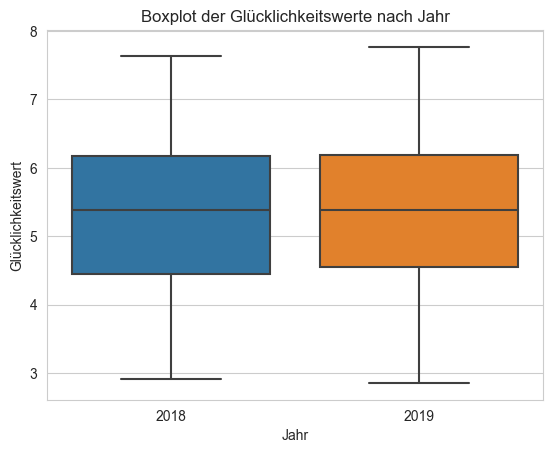

In [6]:
# Boxplot für Glücklichkeitswerte
sns.boxplot(x='Jahr', y='Glücklichkeitswert', data=with_german_columns_2018_2019)
plt.xlabel('Jahr')
plt.ylabel('Glücklichkeitswert')
plt.title('Boxplot der Glücklichkeitswerte nach Jahr')
plt.show()

In [7]:
"""def save_plot(plt, filename):
    plt.savefig(f'export/{filename}', transparent=True, dpi=300)

for column in new_columns:
    save_plot(plt, 'scatterplot_with_legend.png')"""

"def save_plot(plt, filename):\n    plt.savefig(f'export/{filename}', transparent=True, dpi=300)\n\nfor column in new_columns:\n    save_plot(plt, 'scatterplot_with_legend.png')"

In [8]:
fig = px.choropleth(with_german_columns_2018,
              locations="Land",
              color="Glücklichkeitswert",
              locationmode='country names',
              color_continuous_scale='sunset',
              title="Glücklichkeitswert 2018")
fig.show()
fig = px.choropleth(with_german_columns_2019,
              locations="Land",
              color="Glücklichkeitswert",
              locationmode='country names',
              color_continuous_scale='sunset',
              title="Glücklichkeitswert 2019")
fig.show()

In [9]:
fig = px.scatter(with_german_columns_2018_2019,
                   x='BIP pro Kopf',
                   y='Glücklichkeitswert',
                   width=1100,
                   color='Glücklichkeitswert',
                   size="BIP pro Kopf",
                   size_max=15,
                   hover_name="Land",
                   trendline='ols',
                   marginal_x='histogram',
                   marginal_y='violin',
                   range_y=[0,8.5])
                   #range_x=[-0
fig.show()

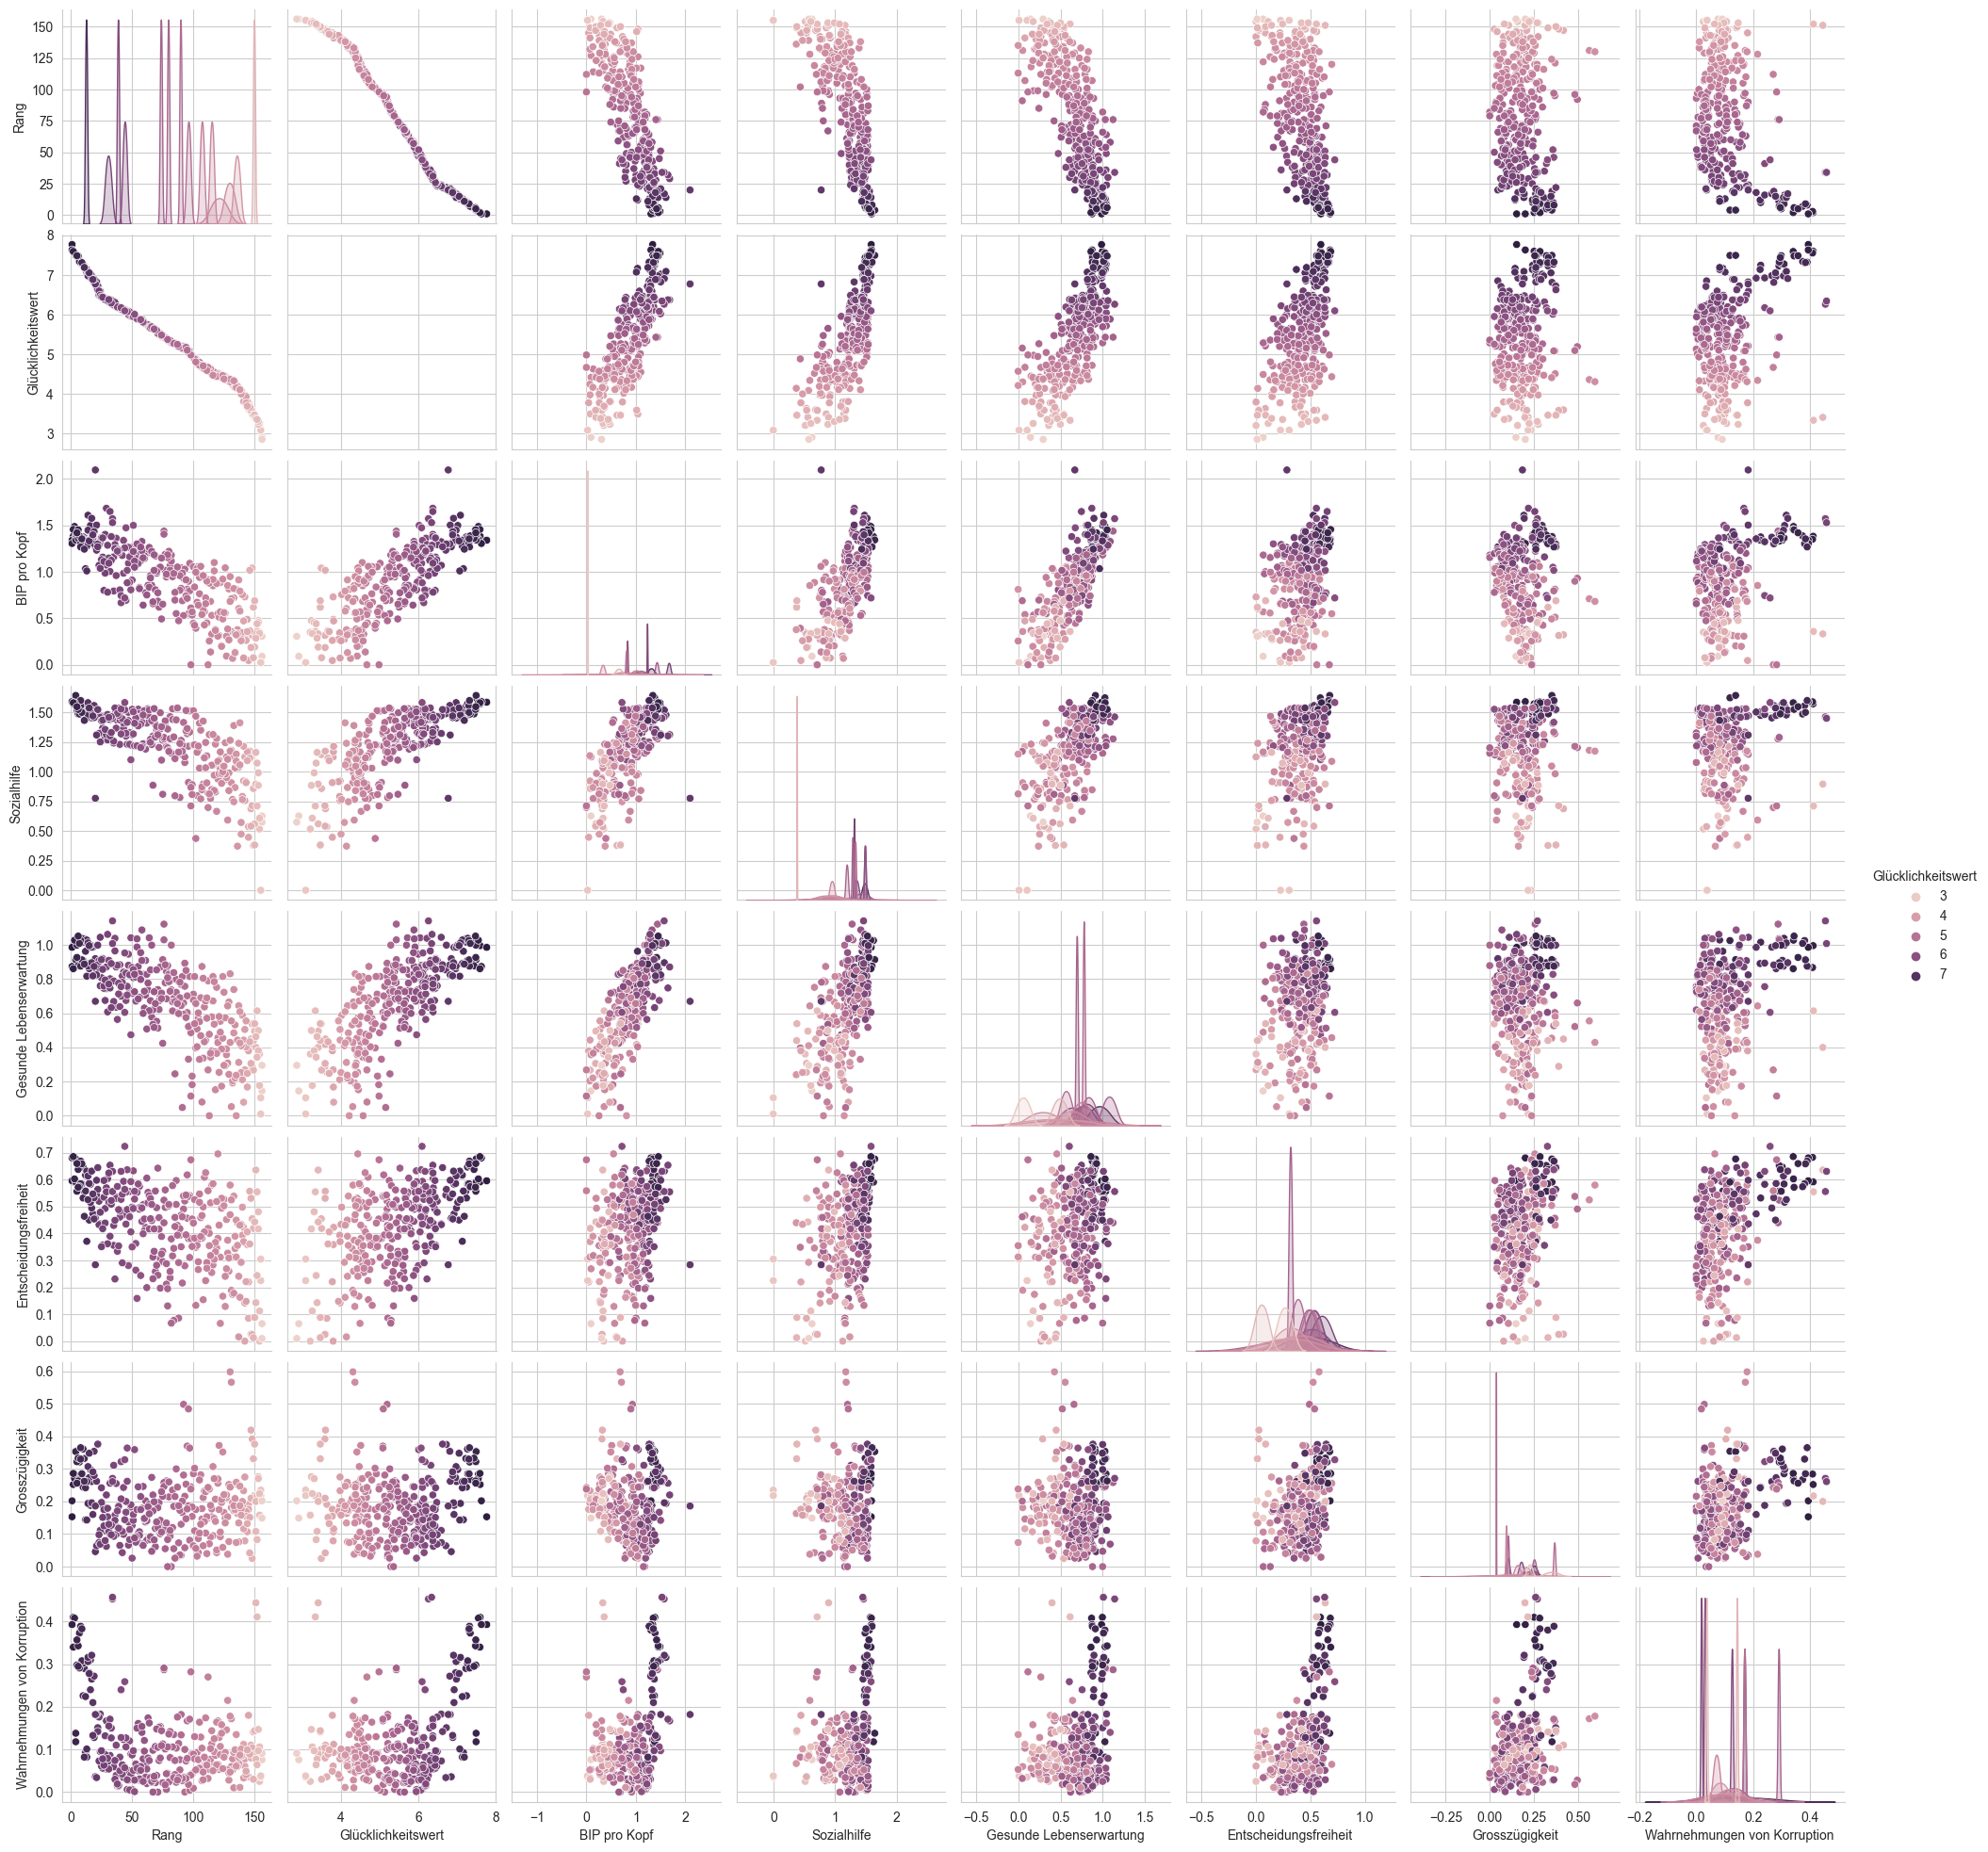

In [10]:
sns.pairplot(with_german_columns_2018_2019, hue='Glücklichkeitswert', vars=['Rang', 'Glücklichkeitswert','BIP pro Kopf','Sozialhilfe','Gesunde Lebenserwartung','Entscheidungsfreiheit','Grosszügigkeit','Wahrnehmungen von Korruption'])

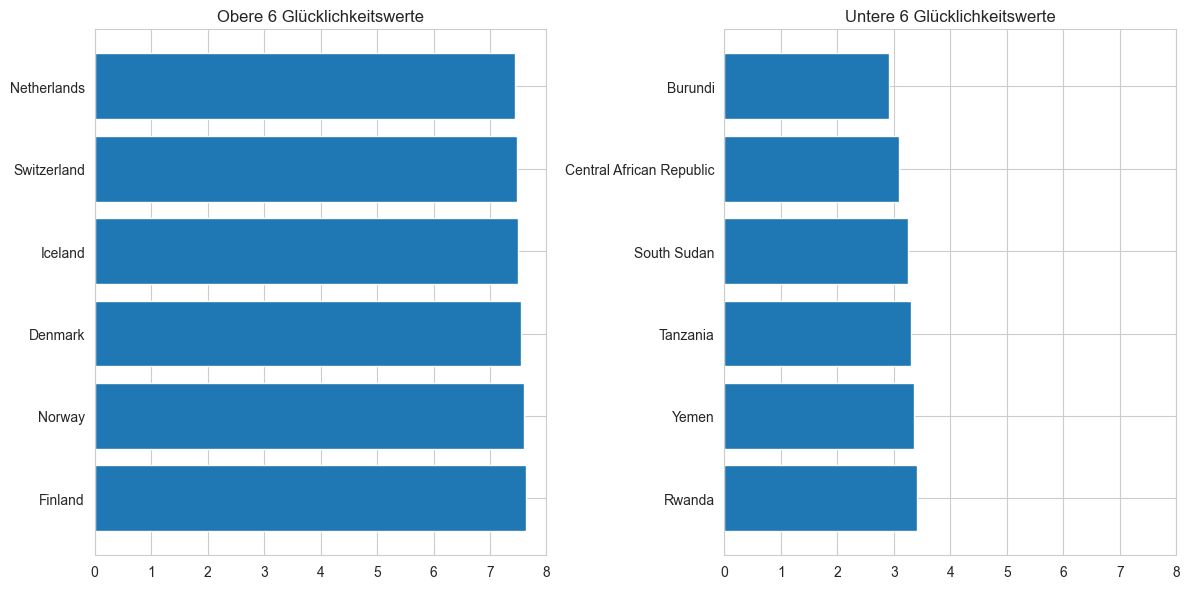

In [20]:


# Annahme: Dein DataFrame heißt 'df' und enthält die erforderlichen Daten

# Die obersten 6 Länder auswählen
top_6_länder = with_german_columns_2018.head(6)

# Die untersten 6 Länder auswählen
bottom_6_länder = with_german_columns_2018.tail(6)

# Daten für die Barplots extrahieren
top_6_ländernamen = top_6_länder['Land']
top_6_glücklichkeitswerte = top_6_länder['Glücklichkeitswert']

bottom_6_ländernamen = bottom_6_länder['Land']
bottom_6_glücklichkeitswerte = bottom_6_länder['Glücklichkeitswert']

# Barplots erstellen
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # Erstes Diagramm für die obersten 6 Länder
plt.barh(top_6_ländernamen, top_6_glücklichkeitswerte)
max_x_lim = 8
min_x_lim = 0
plt.xlim(min_x_lim, max_x_lim)
plt.title('Obere 6 Glücklichkeitswerte')
plt.subplot(1, 2, 2)  # Zweites Diagramm für die untersten 6 Länder
plt.barh(bottom_6_ländernamen, bottom_6_glücklichkeitswerte)
max_x_lim = 8
min_x_lim = 0
plt.xlim(min_x_lim, max_x_lim)
plt.title('Untere 6 Glücklichkeitswerte')
plt.tight_layout()  # Für eine bessere Darstellung

plt.show()

In [25]:
# Annahme: Dein DataFrame heißt 'df' und enthält die erforderlichen Daten

# Unabhängige Variablen auswählen
X = with_german_columns_2018_2019[['Rang','BIP pro Kopf','Sozialhilfe','Gesunde Lebenserwartung','Entscheidungsfreiheit','Grosszügigkeit','Wahrnehmungen von Korruption']]

# Abhängige Variable auswählen
y = with_german_columns_2018_2019['Glücklichkeitswert']

# Regressionsmodell erstellen und anpassen
regression_model = LinearRegression()
regression_model.fit(X, y)

# Koeffizienten und Intercept abrufen
coefficients = regression_model.coef_
intercept = regression_model.intercept_

# Ergebnisse anzeigen
print("Koeffizienten:", coefficients)
print("Intercept:", intercept)

Koeffizienten: [-0.02316405 -0.02517909  0.17436077  0.04100325  0.03170596  0.24371037
  0.44415349]
Intercept: 6.8866874531768


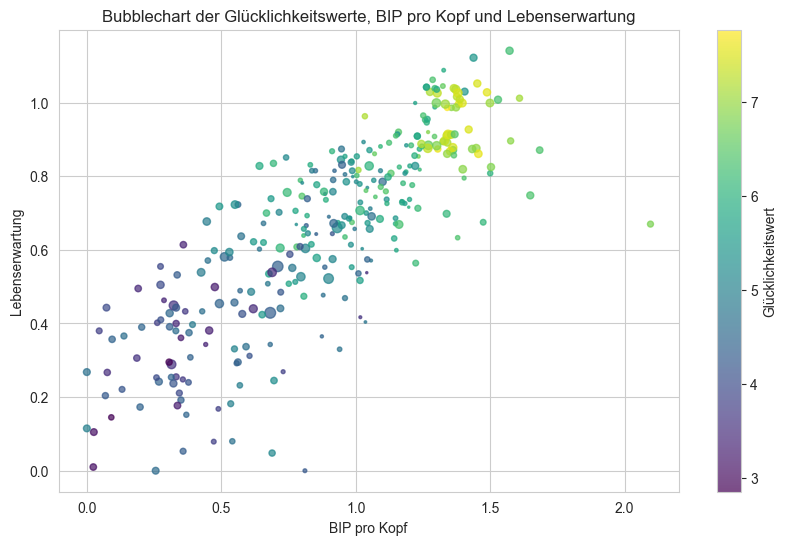

In [30]:
# Beispiel-Daten
länder = with_german_columns_2018_2019['Land']
glücklichkeitswerte = with_german_columns_2018_2019['Glücklichkeitswert']
bip_pro_kopf = with_german_columns_2018_2019['BIP pro Kopf']  # Beispiel für BIP pro Kopf
lebenserwartung = with_german_columns_2018_2019['Gesunde Lebenserwartung']  # Beispiel für Lebenserwartung
grosszügigkeit = with_german_columns_2018_2019['Grosszügigkeit']  # Beispiel für Bevölkerung in Millionen

# Skalieren der Bevölkerungsdaten für die Bubble-Größe
bubble_size = np.array(grosszügigkeit) * 100  # Skalierung für eine geeignete Darstellung

# Bubblechart erstellen
plt.figure(figsize=(10, 6))
plt.scatter(bip_pro_kopf, lebenserwartung, s=bubble_size, c=glücklichkeitswerte, cmap='viridis', alpha=0.7)

# Achsenbeschriftungen
plt.xlabel('BIP pro Kopf')
plt.ylabel('Lebenserwartung')

# Farbskala hinzufügen (Glücklichkeitswerte)
colorbar = plt.colorbar()
colorbar.set_label('Glücklichkeitswert')

# Beschriftungen für die Länder hinzufügen
#for i, land in enumerate(länder):
#    plt.annotate(land, (bip_pro_kopf[i], lebenserwartung[i]), fontsize=10, ha='center', va='bottom')

# Titel hinzufügen
plt.title('Bubblechart der Glücklichkeitswerte, BIP pro Kopf und Lebenserwartung')

plt.grid(True)
plt.show()
